In [1]:
#import os to provide access to functionality dependent on Operating system, The sys module is tells about which Python script is interacting with the host system

import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install contractions

In [3]:
!pip install num2words

In [4]:
import nltk

#Download the punkt package to remove punctuations
nltk.download('punkt')

#Download the stopwors package to remove common stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd                        #Import pandas package as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions      
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter                  #Import contractions package
from num2words import num2words            #Import num2words package
from nltk.tokenize import word_tokenize    #Import the word_tokenizer package
from nltk.tokenize import regexp_tokenize  #Import the regexp_tokenizer package
from nltk.stem import WordNetLemmatizer    #Import the WordNetLemmatizer package
from nltk.stem import PorterStemmer        #Impport the Porter stemmer package

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/Data_Aug/trainset1.csv')

In [7]:
df.head()

,body,intent_2
0,Hi piston! My crankshaft depends on your bore ...,Dependencies between design parameters
1,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters
2,min of 40,Selected design parameter values for objective(s)
3,My flywheel also depends on your crankshaft be...,Dependencies between design parameters
4,45 seems decent,Selected design parameter values for objective(s)


In [8]:
df.drop_duplicates(keep=False, inplace=True)

In [9]:
len(df)

506

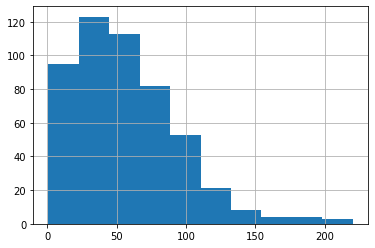

In [10]:
df['body'].str.len().hist()    

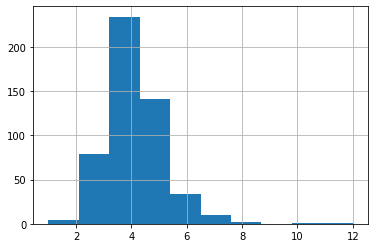

In [11]:
df['body'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x)).hist()

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [13]:
corpus=[]
new= df['body'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [14]:
def plot_top_stopwords_barchart(text):
    stop=stopwords.words('english')
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:16] 
    x,y=zip(*top)
    plt.bar(x,y)


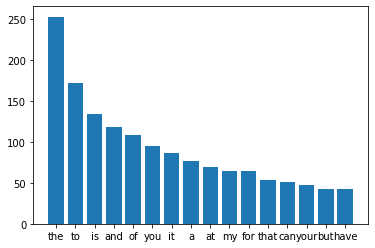

In [15]:
plot_top_stopwords_barchart(df['body'])

In [16]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[0:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

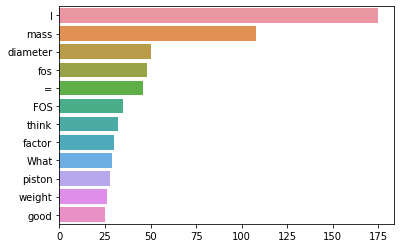

In [17]:
plot_top_non_stopwords_barchart(df['body'])

In [18]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

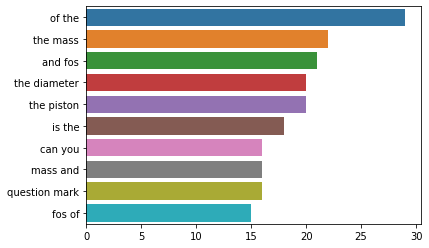

In [19]:
plot_top_ngrams_barchart(df['body'],2)

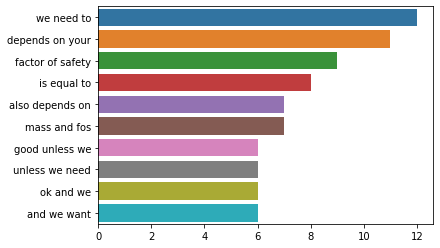

In [20]:
plot_top_ngrams_barchart(df['body'],3)

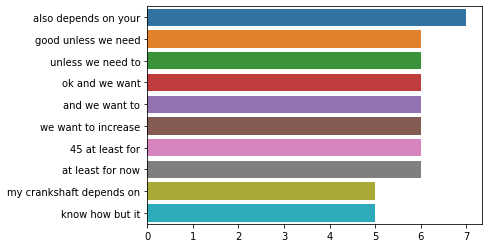

In [21]:
plot_top_ngrams_barchart(df['body'],4)

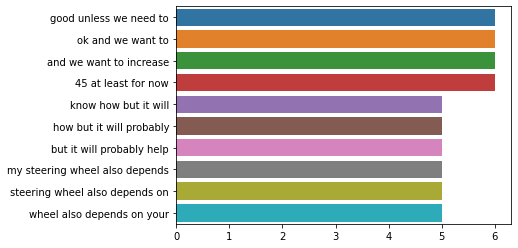

In [22]:
plot_top_ngrams_barchart(df['body'],5)

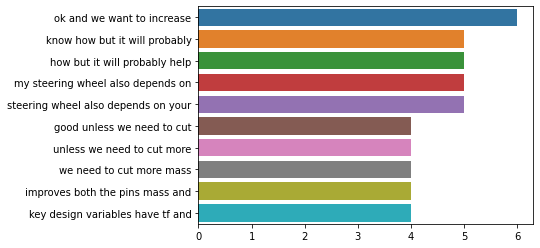

In [23]:
plot_top_ngrams_barchart(df['body'],6)

In [ ]:
!pip install pyLDAvis

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models



def get_lda_objects(text):    
    stop=stopwords.words('english')
    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df['body'])

In [28]:
lda_model.show_topics()

[(0,
  '0.026*"equal" + 0.023*"variable" + 0.017*"mass" + 0.016*"FOS" + 0.015*"What" + 0.014*"low" + 0.014*"fo" + 0.013*"best" + 0.011*"think" + 0.011*"value"'),
 (1,
  '0.038*"mass" + 0.036*"increase" + 0.027*"FOS" + 0.025*"length" + 0.020*"weight" + 0.016*"decrease" + 0.015*"value" + 0.014*"see" + 0.014*"crank" + 0.013*"wheel"'),
 (2,
  '0.052*"diameter" + 0.044*"mass" + 0.027*"factor" + 0.025*"piston" + 0.022*"good" + 0.020*"excellent" + 0.019*"What" + 0.019*"think" + 0.017*"safety" + 0.016*"need"'),
 (3,
  '0.044*"mass" + 0.039*"fo" + 0.029*"value" + 0.023*"changed" + 0.018*"know" + 0.014*"reduce" + 0.014*"help" + 0.013*"like" + 0.013*"lower" + 0.012*"n\'t"')]

In [29]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.149862  0.049189       1        1  31.471981
3     -0.037619 -0.145297       2        1  25.740797
1      0.148207 -0.017159       3        1  23.427598
0      0.039275  0.113267       4        1  19.359625, topic_info=               Term       Freq      Total Category  logprob  loglift
3          diameter  47.000000  47.000000  Default  30.0000  30.0000
43         increase  23.000000  23.000000  Default  29.0000  29.0000
70           length  15.000000  15.000000  Default  28.0000  28.0000
23               fo  40.000000  40.000000  Default  27.0000  27.0000
196           equal  20.000000  20.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
59            value   5.697499  35.080535   Topic4  -4.4999  -0.1756
14        thickness   4.342898  11.965077   Topic4  -4.7714   0.6285
178  factorofsafety   4.486784  15.247068   Topic4  -4.7388   0.4187
180          design   4.312832  14.515272   Topic4  -4.7784   0.4284
38             good   4.422665  25.854283   Topic4  -4.7532  -0.1238

[244 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
526       4  0.946127    .03kg
124       4  0.757341      .52
349       1  0.823475   0-0.12
72        2  0.893600     0.12
33        1  0.925094     0.17
...     ...       ...      ...
377       2  0.834236  without
183       1  0.792678     work
183       2  0.176151     work
292       2  0.716377    would
292       4  0.179094    would

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [30]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text):
    stop=stopwords.words('english')

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

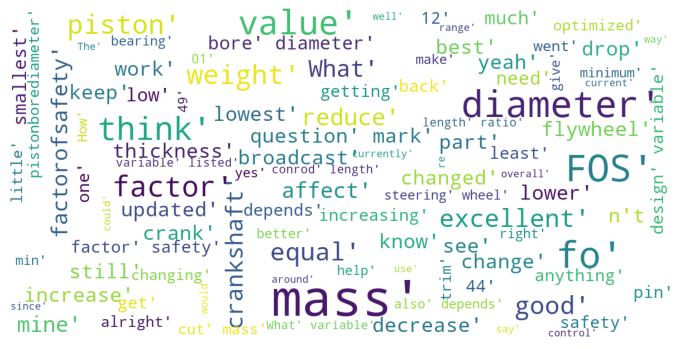

In [31]:
plot_wordcloud(df['body'])